In [46]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score
from sklearn.model_selection import train_test_split
from tensorflow.keras.datasets import mnist


In [48]:
# 1. MNIST verisini yükle
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x = np.concatenate((x_train, x_test))
y = np.concatenate((y_train, y_test))



In [50]:
# 2. Normalizasyon ve düzleştirme (28x28 -> 784)
x = x / 255.0
x = x.reshape((x.shape[0], -1))






In [52]:
# 3. Eğitim ve test verisi (%80 eğitim, %20 test, sınıf dengesi korunarak)
x_train, x_test, y_train, y_test = train_test_split(
    x, y, test_size=0.2, stratify=y, random_state=42
)




In [53]:
# 4. Lojistik Regresyon modeli
model = LogisticRegression(
    max_iter=1000, solver='lbfgs'
)
model.fit(x_train, y_train)



LogisticRegression(max_iter=1000)

In [55]:
# 5. Performans değerlendirmesi
y_pred = model.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='weighted')

print(f"\nModel Başarımı:")
print(f"Accuracy: {accuracy:.4f}")
print(f"F1 Score: {f1:.4f}")




Model Başarımı:
Accuracy: 0.9208
F1 Score: 0.9206



Rastgele 4 Görüntü Çifti Analizi:

Görüntü Çifti 1:
  Tahminler: 7 ve 7
  Mutlak Fark: |7 - 7| = 0
  Max Güven: 0.9978841780843143, 0.9998711532461436
  Geo Güven: 0.0000011062814060, 0.0000000013104601


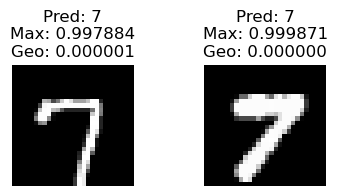

Görüntü Çifti 2:
  Tahminler: 1 ve 8
  Mutlak Fark: |1 - 8| = 7
  Max Güven: 0.9968520484091805, 0.8792898020599605
  Geo Güven: 0.0001823021741138, 0.0036418849963635


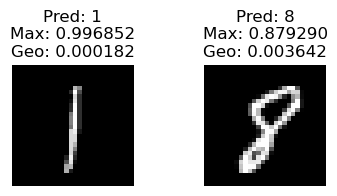

Görüntü Çifti 3:
  Tahminler: 9 ve 1
  Mutlak Fark: |9 - 1| = 8
  Max Güven: 0.9878605311138805, 0.9961652472879678
  Geo Güven: 0.0000019574660784, 0.0000906189609042


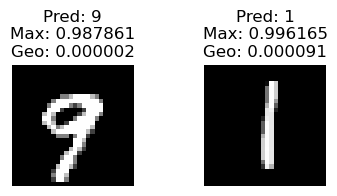

Görüntü Çifti 4:
  Tahminler: 2 ve 5
  Mutlak Fark: |2 - 5| = 3
  Max Güven: 0.8343702801623724, 0.9968023920434825
  Geo Güven: 0.0000225745835114, 0.0000600236844161


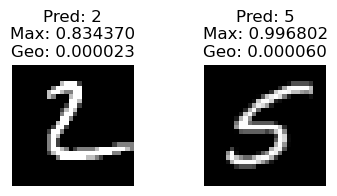

In [86]:
# 6. Rastgele 4 görüntü çifti seç, tahminleri ve farkı göster
print("\nRastgele 4 Görüntü Çifti Analizi:\n")
indices = np.random.choice(len(x_test), size=8, replace=False)

for i in range(0, 8, 2):
    idx1, idx2 = indices[i], indices[i + 1]
    img1, img2 = x_test[idx1].reshape(28, 28), x_test[idx2].reshape(28, 28)

    # Tahmin ve olasılık
    prob1 = model.predict_proba([x_test[idx1]])[0]
    prob2 = model.predict_proba([x_test[idx2]])[0]
    pred1 = np.argmax(prob1)
    pred2 = np.argmax(prob2)

    # Güven oranları
    confidence1_max = prob1[pred1]
    confidence2_max = prob2[pred2]

    confidence1_geo = np.prod(prob1) ** (1 / len(prob1))
    confidence2_geo = np.prod(prob2) ** (1 / len(prob2))

    print(f"Görüntü Çifti {i // 2 + 1}:")
    print(f"  Tahminler: {pred1} ve {pred2}")
    print(f"  Mutlak Fark: |{pred1} - {pred2}| = {abs(pred1 - pred2)}")
    print(f"  Max Güven: {confidence1_max:.16f}, {confidence2_max:.16f}")
    print(f"  Geo Güven: {confidence1_geo:.16f}, {confidence2_geo:.16f}")

    # Görselleştirme
    plt.figure(figsize=(4, 2))
    plt.subplot(1, 2, 1)
    plt.imshow(img1, cmap='gray')
    plt.title(f"Pred: {pred1}\nMax: {confidence1_max:.6f}\nGeo: {confidence1_geo:.6f}")
    plt.axis('off')

    plt.subplot(1, 2, 2)
    plt.imshow(img2, cmap='gray')
    plt.title(f"Pred: {pred2}\nMax: {confidence2_max:.6f}\nGeo: {confidence2_geo:.6f}")
    plt.axis('off')

    plt.tight_layout()
    plt.show()
